***Demonstrate that a neural network to maximize the log likelihood of label is one that has softmax output nodes and minimizes the criterion function of the negative log probability of training data set: J subscript 0 left parenthesis w right parenthesis equals negative log p left parenthesis left curly bracket left parenthesis x subscript n comma t subscript n right parenthesis colon n equals 1 comma 2 comma midline horizontal ellipsis comma right curly bracket semicolon w right parenthesis equals negative log product for n of product from m equals 0 to 9 of p left parenthesis t subscript n equals m vertical line x subscript n semicolon w right parenthesis. Demonstrate that a neural network to maximize the a posterior likelihood of observing the training data given a Gaussian prior of the weight distribution Error converting from MathML to accessible text. is one that minimizes the criterion function with L2 regularization J left parenthesis w right parenthesis equals J subscript 0 left parenthesis w right parenthesis minus log p left parenthesis w semicolon alpha to the power of negative 1 end exponent right parenthesis.    ***

Neural networks with at least one hidden layer are universal approximators, which means that they can approximate any (continuous) function. This approximation can be improved by increasing the number of hidden neurons in the network (but increases the risk of overfitting). A key advantage to neural networks is that they are capable of learning features independently - without much human involvement.


**Softmax function**-It’s called such because it is like a "softened" maximum function and may be used as the output layer's activation function. It takes the form:
 S(fyi)=efyi/∑j efj


Softmax is usually used for multivariate logistic regression because it produces a categorical distribution by squashing activation values to be between 0 and 1 and sum to 1. In our lab we have tried to use it to implement a 
different type of penalty (entropy-based) on distributions. This function has the properties that it sums to 1 and that all of its outputs are positive, which are useful for modeling probability distributions. The cost function to use with softmax is the (categorical) cross-entropy loss function. It has the nice property of having a very big gradient when the target value is 1 and the output is almost 0.

**Negative Log-Likelihood** -
In practice, the softmax function is used in tandem with the negative log-likelihood. This loss function is very interesting if we interpret it in relation to the behavior of softmax. The loss function is:
L(y)=−log(y)

This is summed for all the correct classes.
When training a model, we want to find the minima of a loss function given a set of parameters (in a neural network, these are the weights and biases). We can interpret the loss as the “unhappiness” of the network with respect to its parameters. The higher the loss, the higher the unhappiness: we don’t want that. We want to make our models happy.
 
![alt text](https://ljvmiranda921.github.io/assets/png/cs231n-ann/neg_log.png)

For Example -
Let me assume we have N images and y_i is the label of the image i, where, y_i conatins RC×1 - a binary vector of length C (number of classes). y_{ic}=1 when the image i belongs to class C.

Consider the following two loss functions.

L1=-∑yic * log(P(yic|D) for (c=1 to C)


L2=-∑yic * log(yic - P(yic|D)) for (c=1 to C) 


L2 is not always used with neural networks, indeed for statistical pattern recognition problems the cross-entropy loss (with a softmax activation function for the output layer) is the preferred option.
Secondly, L1 would be a maximum likelihood approach, rather than maximum a-posteriori as there is no prior distribution involved, just a likelihood.

Asymptotically (in the limit of an infinite amount of data and hidden units), both L1 and L2 will give the same answer, because the minimizer of L1 is given when the output of the model is the true probability of class membership, and the minimizer of L2 is the conditional mean of the target variable, which in this case is also the true probability of class membership.
The difference arises from these asymptotic conditions (i.e. more or less every practical case), where I would suggest that L1 is probably more efficient in converging to the optimal solution in terms of the number of training samples given, but I am not confident that the practical difference is likely to be great for most problems.

In practice, most reasonable loss functions are suitable for training neural networks , however we almost always use a maximum likelihood criterion for training neural networks because this is the most theoretically sound approach as it most accurately describes the variability of the target variable around its conditional mean


**2 (a). Build a neural network with 1 hidden layer of 30 sigmoid nodes, and an output layer10 softmax nodes from 1000 training images (100 images per digit). Train the network for 30 complete epochs, using mini-batches of 10 training examples at a time, a learning rate η=0.1. Plot the training error, testing error, criterion function on training data set, criterion function on testing data set of a separate 1000 testing images (100 images per digit), and the learning speed of the hidden layer (the average absolute changes of weights divided by the values of the weights).  **

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
%matplotlib inline

class NeuralNet:

    def __init__(self, num_of_layers=1, l2=False):

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Flatten())

        if l2:
            for _ in range(num_of_layers):
                self.model.add(
                    tf.keras.layers.Dense(
                        30, activation=tf.sigmoid,
                        kernel_regularizer=tf.keras.regularizers.l2(5)
                    )
                )

        else:
            for _ in range(num_of_layers):
                self.model.add(tf.keras.layers.Dense(30, activation=tf.sigmoid))

        self.model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

        self.yhat = []
        self.model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

    def predict(self, x, y):
        self.yhat = np.argmax(self.model.predict(x), axis=1)
        accuracy = metrics.accuracy_score(y, self.yhat)

        return accuracy

    def fit(self, x, y, validation_data, epochs):
        return self.model.fit(x, y, validation_data=validation_data, epochs=epochs, batch_size=10, verbose=0)


class ConvolutionalNeuralNet:
    
    def __init__(self):
        self.model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), activation='relu', input_shape=(28,28,1)),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
            tf.keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1000, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
        ])
        
        self.model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=0.1),
              metrics=['accuracy'])
    
    def shift_rotate(self, rotate_degree, shift_pixel):
        self.datagen = ImageDataGenerator(
            featurewise_center=True,
            featurewise_std_normalization=True,
            rotation_range=rotate_degree,
            width_shift_range=shift_pixel,
            height_shift_range=shift_pixel,
            horizontal_flip=True
        )
        
    def predict(self, x_test, y_test):
        return self.model.evaluate(x_test, y_test, verbose=0)
      
    def fit(self, x, y, validation_data, batch_size, epochs):
        self.model.fit_generator(self.datagen.flow(
                                      train_x, train_y,
                                      batch_size=batch_size),
                                      steps_per_epoch=len(train_x)/batch_size,
                                      epochs=epochs,
                                      verbose=0
                                )

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:x_train.shape[0]-10000]
y_train = y_train[:y_train.shape[0]-10000]

data = {}

for i in range(10):
    data[i] = list()

for i in range(len(x_train)):
    data[y_train[i]].append(x_train[i])

In [ ]:
train_x = list()
train_y = list()

for i in range(len(data)):
    for j in range(100):
        train_x.append(data[i][j])
        train_y.append(i)

train_x = np.asarray(train_x)
train_y = np.asarray(train_y)

In [ ]:
nn = NeuralNet()
train = nn.fit(train_x, train_y, (x_val, y_val), epochs=30)
accuracy = nn.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")

Accuracy: 87.42%


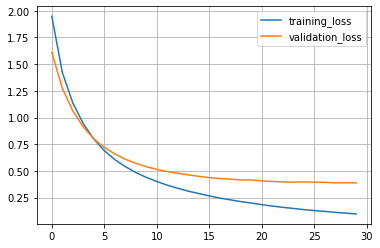

In [ ]:
df = pd.DataFrame()
df['training_loss'] = train.history['loss']
df['validation_loss'] = train.history['val_loss']
df.plot(grid=True)

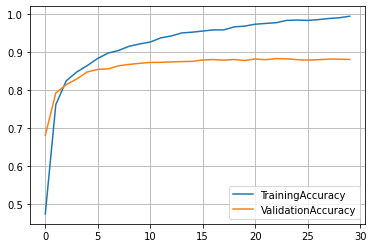

In [ ]:
df = pd.DataFrame()
df['TrainingAccuracy']  = train.history['accuracy']
df['ValidationAccuracy']    = train.history['val_accuracy']
df.plot(grid=True)

2(b). Repeat 2(a) with


*   Part 1 - 2 hidden layers of 30 sigmoid nodes each
*   Part 2 - 3 hidden layers of 30 sigmoid nodes each, and with and without L2 regularization lambda vertical line w vertical line squared and lambda equals 5.


*   Part 3 - 1 hidden layer with regularization
*   Part 4 - 2 hidden layer with regularization
*   Part 5 - 3 hidden layer with regularization


**2b Part 1 - 2 hidden layer with 30 sigmoid nodes each**

In [ ]:
nn = NeuralNet(num_of_layers=2)
train = nn.fit(train_x, train_y, (x_val, y_val), epochs=30)
accuracy = nn.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")

Accuracy: 86.41%


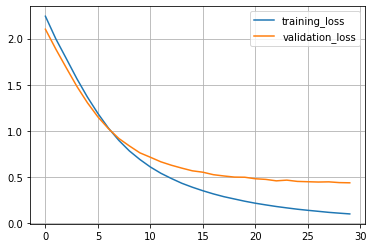

In [ ]:
df = pd.DataFrame()
df['training_loss'] = train.history['loss']
df['validation_loss'] = train.history['val_loss']
df.plot(grid=True)

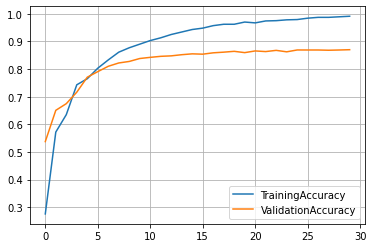

In [ ]:
df = pd.DataFrame()
df['TrainingAccuracy']  = train.history['accuracy']
df['ValidationAccuracy']    = train.history['val_accuracy']
df.plot(grid=True)

**2b Part 2 -3 hidden layer with 30 sigmoid nodes each**

In [ ]:
nn = NeuralNet(num_of_layers=3)
train = nn.fit(train_x, train_y, (x_val, y_val), epochs=30)
accuracy = nn.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")

Accuracy: 83.54%


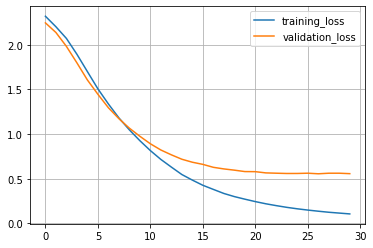

In [ ]:
df = pd.DataFrame()
df['training_loss'] = train.history['loss']
df['validation_loss'] = train.history['val_loss']
df.plot(grid=True)

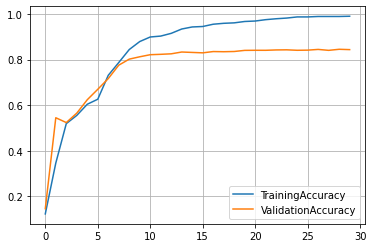

In [ ]:
df = pd.DataFrame()
df['TrainingAccuracy']  = train.history['accuracy']
df['ValidationAccuracy']    = train.history['val_accuracy']
df.plot(grid=True)

**2b Part 3 -L2 regularization with 1 hidden layer**

In [ ]:
nn = NeuralNet(l2=True)
train = nn.fit(train_x, train_y, (x_val, y_val), epochs=30)
accuracy = nn.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")

Accuracy: 10.21%


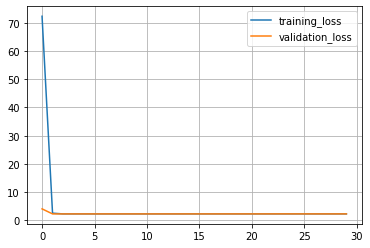

In [ ]:
df = pd.DataFrame()
df['training_loss'] = train.history['loss']
df['validation_loss'] = train.history['val_loss']
df.plot(grid=True)

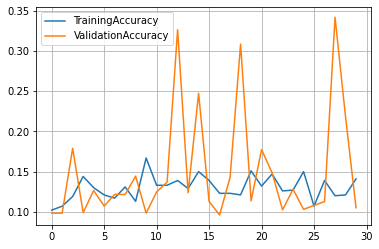

In [ ]:
df = pd.DataFrame()
df['TrainingAccuracy']  = train.history['accuracy']
df['ValidationAccuracy']    = train.history['val_accuracy']
df.plot(grid=True)

**2b Part 4 -L2 regularization and 2 hidden layers**

In [ ]:
nn = NeuralNet(num_of_layers=2, l2=True)
train = nn.fit(train_x, train_y, (x_val, y_val), epochs=30)
accuracy = nn.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")

Accuracy: 10.28%


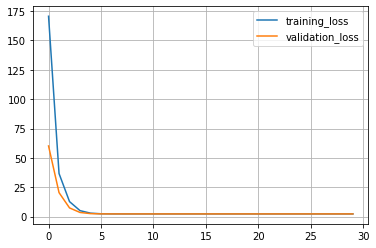

In [ ]:
df = pd.DataFrame()
df['training_loss'] = train.history['loss']
df['validation_loss'] = train.history['val_loss']
df.plot(grid=True)

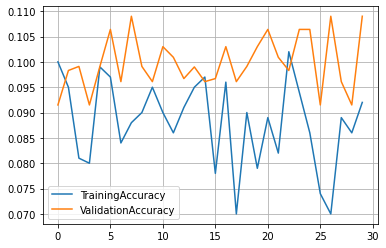

In [ ]:
df = pd.DataFrame()
df['TrainingAccuracy']  = train.history['accuracy']
df['ValidationAccuracy']    = train.history['val_accuracy']
df.plot(grid=True)

**2b Part 5 - L2 regularization and 3 hidden layers**

In [ ]:
nn = NeuralNet(num_of_layers=3, l2=True)
train = nn.fit(train_x, train_y, (x_val, y_val), epochs=30)
accuracy = nn.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")

Accuracy: 10.32%


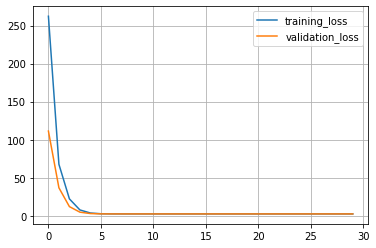

In [ ]:
df = pd.DataFrame()
df['training_loss'] = train.history['loss']
df['validation_loss'] = train.history['val_loss']
df.plot(grid=True)

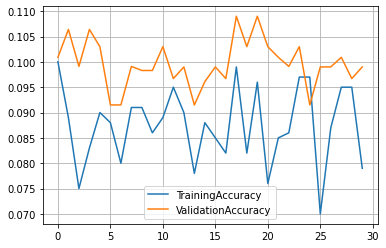

In [ ]:
df = pd.DataFrame()
df['TrainingAccuracy']  = train.history['accuracy']
df['ValidationAccuracy']    = train.history['val_accuracy']
df.plot(grid=True)

**Convolutional Neural Network (CNN)**

**2 (c). Construct and train convolutional neural network for MNIST classification. Augment your selection of 1000 images by rotating them for 1-3 degrees clockwise and counter clockwise, and shifting them for 3 pixels in 8 different directions.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

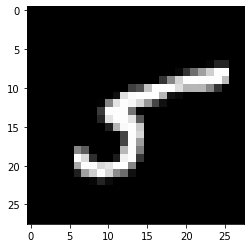

In [ ]:
plt.imshow(np.squeeze(X_train[65]), cmap='gray')

In [ ]:
# Three steps to create a CNN
# 1. Convolution
# 2. Activation
# 3. Pooling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(BatchNormalization(axis=-1))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [ ]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [ ]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5
937/937 [==============================] - 179s 191ms/step - loss: 0.1259 - accuracy: 0.9611 - val_loss: 0.0044 - val_accuracy: 0.9866
Epoch 2/5
937/937 [==============================] - 179s 191ms/step - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.0932 - val_accuracy: 0.9882
Epoch 3/5
937/937 [==============================] - 184s 196ms/step - loss: 0.0457 - accuracy: 0.9858 - val_loss: 0.0787 - val_accuracy: 0.9916
Epoch 4/5
937/937 [==============================] - 179s 191ms/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 0.0061 - val_accuracy: 0.9910
Epoch 5/5
937/937 [==============================] - 179s 191ms/step - loss: 0.0364 - accuracy: 0.9890 - val_loss: 0.0017 - val_accuracy: 0.9879


In [ ]:
score = model.evaluate(X_test, Y_test)
print('\nTest accuracy: ', score[1])

10000/10000 [==============================] - 8s 795us/step

Test accuracy:  0.9879999756813049


In [ ]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)